## Questions for Katarina

#### Strategy for matching call data to invoice data based on first name and last name
- Call Data: first letter of first name, last name
- Invoice Data: first name, last name
- Dates vary due to billing cycle and time to complete job

#### Model 1: Predicting 'Amount After Discount' based on invoice data
- Attributes: Sales Type, Qty, Item Code, Item Description, Job Type, Location PC
- Item Description has allot that needs to be cleaned and also seems to be written out on a per job basis by whoever did the job so there are no classes its all unique text entries

#### Model 2: Predicting all attributes for first model based on call data
- Using the transcribed call data and the following attributes: Duration, Type, Call Status, Address (if they have it)
- Is this too abstract? is there a better way?

#### Additional Considerations:
- 'Amount After Discount' delta depending on tech lead / person assigned to the job
- What is best practice for back end?

## Questions for John
- what is the typical difference between prospet and invoice date?


## Data Overview

Loading the data

In [474]:
CALL_PATH = "datasets/2018_Finan_Call_data.csv"
INVOICE_PATH = "datasets/2018_Finan_Invoice_data.csv"

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
call_data = pd.read_csv(CALL_PATH)
invoice_data = pd.read_csv(INVOICE_PATH)

In [475]:
call_data.head()

,Date,Time,Employee,Location,Extension Routing,Ad Source,Routed Type,Result,Duration,Status,Tracking Number,Caller Number,Target Number,Missed Opp,Prospect/Non-Prospect,Call Status,Call Id,Audio URL,Campaign Id,Campaign Name,Location Code,Location Id,First Name,Last Name,Street Address,City,State,Zip Code,Country,Appointment Set,Appointment Date and Time,Call Alert Status
0,12/31/2018,3:34:46 PM,Sara Tekle(15),Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,92,Unreviewed,2262133833,5198712606,5194550453,Y,Service,Existing Customer Prospect,1028292394,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,No,NaN,Service Alert
1,12/31/2018,11:06:47 AM,None Specified(123),Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,252,Unreviewed,2262133833,5194741974,5194550453,N,Service,Existing Customer Prospect,747457303,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,F,YIM,63 LAUREL CT,LONDON ON,NaN,NaN,Canada,NaN,NaN,NaN
2,12/31/2018,9:58:08 AM,NaN,Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,82,Unreviewed,2262133833,5199334418,5194550453,NaN,General Business,Repeat Caller,747424624,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN
3,12/31/2018,8:52:05 AM,Maria Bethke - CC(11),Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,NaN,Connected,245,Unreviewed,2262133833,5196739365,5194550453,N,Service,New Prospect,1028403248,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Yes,12/31/2018 6:45 AM,NaN
4,12/30/2018,4:46:08 PM,None Specified(123),Finan Home Service - Nexstar,NaN,Web Site/Organic-Website,Time Of Day,Connected,280,Unreviewed,2262133833,7054651946,5198585910,Y,Service,Answering Service/Call Center,1028426482,https://reports.callsource.com/assets/audio/20...,11454451,NaN,4728548,4728548,NaN,NaN,NaN,NaN,NaN,NaN,Canada,No,NaN,Service Alert


In [476]:
invoice_data.head()

,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location Last Name,Location First name,Location Compnay Name,Location Address,Location City,Loccation Provingce,Location PC
0,2018-02-01,2018-02-01,102570,102570,NaN,AGRREN,1.0,PT,Precision Tuneup (#401428),NaN,$167.64,Agreement,NaN,NaN,NaN,18,NaN,NaN,YP,Phonebook,NaN,345859,Henderson,Marg,NaN,16 Chapple Hill Road,London,ON,N6G 2H3,Henderson,Marg,NaN,16 Chapple Hill Road,London,ON,N6G 2H3
1,2018-08-01,2018-08-01,129225,129225,MIKEJ,INST,1.0,GENINST,Deposit for water heater.,NaN,$234.21,Job,247574,RYANC,RENO,19,REF,Referral,REF,Referral,NaN,346644,Windibanks,Kurt,NaN,10952 Oxbow Drive,Komoka,ON,N0L 1R0,Windibanks,Kurt,NaN,10952 Oxbow Drive,Komoka,ON,N0L 1R0
2,2018-04-01,2018-04-01,110472,110472,NaN,AGRNEW,1.0,PT2,Deposit on Precision Tuneup - FAC (#401663),NaN,$13.97,Agreement,NaN,NaN,NaN,18,NaN,NaN,REAL,Other,NaN,347779,Cassan,Douglas,NaN,54 Runnymede Crescent,London,ON,N6G 1Z8,Cassan,Douglas,NaN,54 Runnymede Crescent,London,ON,N6G 1Z8
3,2018-01-04,2018-01-04,129578,129578,MIKEJ,INST,1.0,GENINST,Install 125A panel,NaN,"$1,621.68",Job,249651,GLYN,PANEL,11,TRUCK,Company Supplied,TRUCK,Company Supplied,NaN,348241,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7
4,2018-01-04,2018-01-04,129578,129578,MIKEJ,INST,1.0,GENINST,Install 125A meter base,NaN,"$1,234.97",Job,249651,GLYN,PANEL,11,TRUCK,Company Supplied,TRUCK,Company Supplied,NaN,348241,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7,King,Steve,NaN,1023 Apache Road,London,ON,N5V 2V7


### Cleaning the Call Data

Getting rid of useless columns

In [477]:
call_data = call_data.drop(["Location", "Extension Routing", "Ad Source", "Routed Type", "Result", "Campaign Name", "Location Code", "Location Id", "State"], axis=1)

In [478]:
call_data = call_data.rename(columns={'Prospect/Non-Prospect': 'Type'})
call_data.head()


,Date,Time,Employee,Duration,Status,Tracking Number,Caller Number,Target Number,Missed Opp,Type,Call Status,Call Id,Audio URL,Campaign Id,First Name,Last Name,Street Address,City,Zip Code,Country,Appointment Set,Appointment Date and Time,Call Alert Status
0,12/31/2018,3:34:46 PM,Sara Tekle(15),92,Unreviewed,2262133833,5198712606,5194550453,Y,Service,Existing Customer Prospect,1028292394,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,No,NaN,Service Alert
1,12/31/2018,11:06:47 AM,None Specified(123),252,Unreviewed,2262133833,5194741974,5194550453,N,Service,Existing Customer Prospect,747457303,https://reports.callsource.com/assets/audio/20...,11454451,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,NaN,NaN,NaN
2,12/31/2018,9:58:08 AM,NaN,82,Unreviewed,2262133833,5199334418,5194550453,NaN,General Business,Repeat Caller,747424624,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,NaN,NaN,NaN
3,12/31/2018,8:52:05 AM,Maria Bethke - CC(11),245,Unreviewed,2262133833,5196739365,5194550453,N,Service,New Prospect,1028403248,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,Yes,12/31/2018 6:45 AM,NaN
4,12/30/2018,4:46:08 PM,None Specified(123),280,Unreviewed,2262133833,7054651946,5198585910,Y,Service,Answering Service/Call Center,1028426482,https://reports.callsource.com/assets/audio/20...,11454451,NaN,NaN,NaN,NaN,NaN,Canada,No,NaN,Service Alert


Split out columns I'm not sure about:
- Status
- TracKing Number
- Target Number
- Missed Opp 
- Campaign Id 
- Appointment Set 
- Appointment Date and Time
- Call Alert Status

In [479]:
unsure_call_data = call_data.filter(['Status', 'Tracking Number', 'Target Number', 'Missed Opp', 'Campaign Id', 'Appointment Set', 'Appointment Date and Time', 'Call Alert Status'], axis=1)
unsure_call_data.head()

,Status,Tracking Number,Target Number,Missed Opp,Campaign Id,Appointment Set,Appointment Date and Time,Call Alert Status
0,Unreviewed,2262133833,5194550453,Y,11454451,No,NaN,Service Alert
1,Unreviewed,2262133833,5194550453,N,11454451,NaN,NaN,NaN
2,Unreviewed,2262133833,5194550453,NaN,11454451,NaN,NaN,NaN
3,Unreviewed,2262133833,5194550453,N,11454451,Yes,12/31/2018 6:45 AM,NaN
4,Unreviewed,2262133833,5198585910,Y,11454451,No,NaN,Service Alert


In [480]:
call_data = call_data.drop(['Status', 'Tracking Number', 'Target Number', 'Missed Opp', 'Campaign Id', 'Appointment Set', 'Appointment Date and Time', 'Call Alert Status'], axis=1)
call_data.head()

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country
0,12/31/2018,3:34:46 PM,Sara Tekle(15),92,5198712606,Service,Existing Customer Prospect,1028292394,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada
1,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,747457303,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada
2,12/31/2018,9:58:08 AM,NaN,82,5199334418,General Business,Repeat Caller,747424624,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada
3,12/31/2018,8:52:05 AM,Maria Bethke - CC(11),245,5196739365,Service,New Prospect,1028403248,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada
4,12/30/2018,4:46:08 PM,None Specified(123),280,7054651946,Service,Answering Service/Call Center,1028426482,https://reports.callsource.com/assets/audio/20...,NaN,NaN,NaN,NaN,NaN,Canada


In [481]:
call_data.shape

(2428, 15)

How many entries actually have no fields missing?

In [482]:
full_call_data = call_data.dropna()

In [483]:
full_call_data.shape

(133, 15)

Okay not great, how many entires have first names and last names or an address?

In [484]:
named_call_data = call_data.dropna(subset=['First Name', 'Last Name'])
address_call_data = call_data.dropna(subset=['Street Address'])

In [485]:
named_call_data.shape

(596, 15)

In [486]:
address_call_data.shape

(762, 15)

lets combine these two

In [487]:
tagged_call_data = pd.concat([named_call_data, address_call_data]).drop_duplicates().reset_index(drop=True)
tagged_call_data.shape

(778, 15)

Alright now how many of these are prospects?

In [488]:
# drop missing attributes for Type
temp = tagged_call_data.dropna(subset=['Type'])
temp.shape

(736, 15)

In [489]:
# drop General Business calls and Hang up
temp=temp[tagged_call_data.Type != 'General Business']
temp=temp[tagged_call_data.Type != 'Hang-up']
temp.shape

c:\users\yanick\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\yanick\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(571, 15)

Okay that should be enough

In [490]:
ref_call = temp
ref_call.head()

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country
0,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,747457303,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada
1,12/28/2018,4:26:10 PM,Sara Tekle(15),64,5194536274,Sales,New Prospect,747102573,https://reports.callsource.com/assets/audio/20...,E,ZWIERS,111 PINE LAWN AVE,LONDON ON,NaN,Canada
2,12/28/2018,3:36:45 PM,Sara Tekle(15),267,5196791876,Service,Existing Customer Prospect,1028604229,https://reports.callsource.com/assets/audio/20...,A,GRAHAM,NaN,LONDON ON,NaN,Canada
3,12/28/2018,10:55:48 AM,None Specified(123),259,5196793494,Service,Existing Customer Prospect,746880683,https://reports.callsource.com/assets/audio/20...,TYNINA,LUSTER,619 WILLIAM ST,LONDON,N6B3P9,Canada
5,12/27/2018,4:06:56 PM,Sara Tekle(15),309,5194722854,Service,New Prospect,746642373,https://reports.callsource.com/assets/audio/20...,R,DRISCOLL,134 FITZWILLIAM BLVD,LONDON ON,NaN,Canada


### Linking Call Data to Invoice Data

In [491]:
invoice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 36 columns):
Inv Date                     8700 non-null object
Post Date                    8700 non-null object
Billing Acct                 8700 non-null int64
Location ID                  8700 non-null int64
Sales Rep                    4842 non-null object
Sale Type                    8700 non-null object
Qty                          8700 non-null float64
Item Code                    8700 non-null object
Item Description             8700 non-null object
Discount                     562 non-null object
Amount After Discount        7626 non-null object
Unnamed: 11                  8700 non-null object
Job #                        4525 non-null object
Tech                         4523 non-null object
Job Type                     4525 non-null object
Dept                         8700 non-null int64
Job Lead Source              4435 non-null object
Job Lead source Type         4435 non-null obj

In [492]:
(invoice_data['Billing last name'] == invoice_data['Location Last Name']).sum()


8106

In [493]:
(invoice_data['Billing first name'] == invoice_data['Location First name']).sum()

8016

Alright so most billing and location names match - we'll go with location name since it's more likely the person that called in
Now lets create an array with first and last names of our callers

In [494]:
#outer join on last name
invoice_test = invoice_data
invoice_test['Location Last Name'] = invoice_test['Location Last Name'].str.upper()
invoice_test.rename(columns={'Location Last Name':'Last Name'}, inplace=True)
merged = pd.merge(ref_call, invoice_test, how='outer', on=['Last Name'])
merged

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location First name,Location Compnay Name,Location Address,Location City,Loccation Provingce,Location PC
0,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-01,2018-01-01,117406.0,117406.0,NaN,AGRREN,1.0,SC-FAC,Deposit on System Check - Furnace & A/C (#402319),NaN,$13.97,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349046.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
1,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-12,2018-01-12,117406.0,117406.0,GLYN,SERV,1.0,PRMO-025,Ground Fault Circuit Interuptor,NaN,$90.00,Job,250133,GLYN,TRBL,11.0,REP,Other,NaN,NaN,NaN,349062.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
2,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-12,2018-01-12,117406.0,117406.0,GLYN,DISC,1.0,DISC,Discount,$9.00,-$9.00,Job,250133,GLYN,TRBL,11.0,REP,Other,NaN,NaN,NaN,349062.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
3,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-20,2018-01-20,117406.0,117406.0,MIKEY,SERV,1.0,EMERG,Emergency Dispatch Fee,NaN,$90.00,Job,250274,MIKEY,TRBL,11.0,REP,Other,NaN,NaN,NaN,349188.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
4,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-20,2018-01-20,117406.0,117406.0,MIKEY,SERV,1.0,PRMO-055,Standard Receptacle,$6.79,$61.11,Job,250274,MIKEY,TRBL,11.0,REP,Other,NaN,NaN,NaN,349188.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
5,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-20,2018-01-20,117406.0,117406.0,MIKEY,SERV,1.0,DIA-01,Level 1 Diagnosis (Minor),$13.20,$118.77,Job,250274,MIKEY,TRBL,11.0,REP,Other,NaN,NaN,NaN,349188.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
6,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-02-01,2018-02-01,117406.0,117406.0,NaN,AGRPB,1.0,SC-FAC,Billing for System Check - Furnace & A/C (#402...,NaN,$12.81,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349630.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3
7,12/31/2018,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-02-01

In [495]:
merged = merged.dropna(subset=['Audio URL'])
merged = merged.dropna(subset=['Item Code'])

# if we can get addresses to work then we can refine this
merged = merged.dropna(subset=['Last Name'])
merged = merged.dropna(subset=['First Name'])

merged['Date'] = pd.to_datetime(merged['Date'])
merged['Inv Date'] = pd.to_datetime(merged['Inv Date'])
merged['Location First name'] = merged['Location First name'].str.upper()
merged['Location Address'] = merged['Location Address'].str.upper()

# for index, row in merged.iterrows():
#     if(isinstance(row['Street Address'],str)):
#         merged.loc[index, 'Street Address'] = ' '.join(row['Street Address'].split()[:2])
#     if(isinstance(row['Location Address'],str)):
#         merged.loc[index, 'Location Address'] = ' '.join(row['Location Address'].split()[:2])

# # getting only the first two words of addresses for comparisson purposes
# addr_temp = merged.dropna(subset=['Street Address', 'Location Address'])
# addr_temp['Street Address'] = ' '.join(addr_temp['Street Address'].str.split()[:2])
# addr_temp['Location Address'] = ' '.join(addr_temp['Location Address'].str.split()[:2])
        
# addr_temp

In [496]:
# create a sparse matrix
# from scipy.sparse import csr_matrix
# sparse_merged = csr_matrix(merged)

merged['Match'] = np.where((((merged['First Name'] == merged['Location First name']) | (merged['First Name'].str[0] == merged['Location First name'].str[0]) | (merged['Street Address'] == merged['Location Address'])) & (merged['Date'] < merged['Inv Date'])), True, False)
merged



,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location First name,Location Compnay Name,Location Address,Location City,Loccation Provingce,Location PC,Match
0,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-01,2018-01-01,117406.0,117406.0,NaN,AGRREN,1.0,SC-FAC,Deposit on System Check - Furnace & A/C (#402319),NaN,$13.97,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349046.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
1,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-12,2018-01-12,117406.0,117406.0,GLYN,SERV,1.0,PRMO-025,Ground Fault Circuit Interuptor,NaN,$90.00,Job,250133,GLYN,TRBL,11.0,REP,Other,NaN,NaN,NaN,349062.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
2,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-12,2018-01-12,117406.0,117406.0,GLYN,DISC,1.0,DISC,Discount,$9.00,-$9.00,Job,250133,GLYN,TRBL,11.0,REP,Other,NaN,NaN,NaN,349062.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
3,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-20,2018-01-20,117406.0,117406.0,MIKEY,SERV,1.0,EMERG,Emergency Dispatch Fee,NaN,$90.00,Job,250274,MIKEY,TRBL,11.0,REP,Other,NaN,NaN,NaN,349188.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
4,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-20,2018-01-20,117406.0,117406.0,MIKEY,SERV,1.0,PRMO-055,Standard Receptacle,$6.79,$61.11,Job,250274,MIKEY,TRBL,11.0,REP,Other,NaN,NaN,NaN,349188.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
5,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-20,2018-01-20,117406.0,117406.0,MIKEY,SERV,1.0,DIA-01,Level 1 Diagnosis (Minor),$13.20,$118.77,Job,250274,MIKEY,TRBL,11.0,REP,Other,NaN,NaN,NaN,349188.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
6,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-02-01,2018-02-01,117406.0,117406.0,NaN,AGRPB,1.0,SC-FAC,Billing for System Check - Furnace & A/C (#402...,NaN,$12.81,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349630.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
7,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,

In [497]:
print((merged['Match']==True).sum())
print((merged['Match']==False).sum())

607
2198


In [498]:
merged_unique = merged.drop_duplicates(subset=['Call Id'], keep='first', inplace=False)
print((merged_unique['Match']==True).sum())
print((merged_unique['Match']==False).sum())

36
222


In [499]:
merged_unique

,Date,Time,Employee,Duration,Caller Number,Type,Call Status,Call Id,Audio URL,First Name,Last Name,Street Address,City,Zip Code,Country,Inv Date,Post Date,Billing Acct,Location ID,Sales Rep,Sale Type,Qty,Item Code,Item Description,Discount,Amount After Discount,Unnamed: 11,Job #,Tech,Job Type,Dept,Job Lead Source,Job Lead source Type,Location Lead Source,Location Lead Source Type,Unnamed: 20,Invoive #,Billing last name,Billing first name,Billing Company name,Billing Address,Billing City,Billing Prov,Billing PC,Location First name,Location Compnay Name,Location Address,Location City,Loccation Provingce,Location PC,Match
0,2018-12-31,11:06:47 AM,None Specified(123),252,5194741974,Service,Existing Customer Prospect,7.474573e+08,https://reports.callsource.com/assets/audio/20...,F,YIM,63 LAUREL CT,LONDON ON,NaN,Canada,2018-01-01,2018-01-01,117406.0,117406.0,NaN,AGRREN,1.0,SC-FAC,Deposit on System Check - Furnace & A/C (#402319),NaN,$13.97,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,349046.0,Yim,Teresa,NaN,63 Laurel Court,London,ON,N6H 4W3,TERESA,NaN,63 LAUREL COURT,London,ON,N6H 4W3,False
28,2018-12-28,3:36:45 PM,Sara Tekle(15),267,5196791876,Service,Existing Customer Prospect,1.028604e+09,https://reports.callsource.com/assets/audio/20...,A,GRAHAM,NaN,LONDON ON,NaN,Canada,2018-01-01,2018-01-01,123928.0,123928.0,NaN,AGRNEW,1.0,SC-FAC,Deposit on System Check - Furnace & A/C (#402159),NaN,$13.97,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,YP,Phonebook,NaN,348880.0,Graham,Doreen,NaN,41 Brixham Road,London,ON,N6K 1P5,DOREEN,NaN,41 BRIXHAM ROAD,London,ON,N6K 1P5,False
68,2018-05-11,2:21:07 PM,Diana Verbeek(10),184,5196600608,Sales,New Prospect,1.067468e+09,https://reports.callsource.com/assets/audio/20...,BRIAN,GRAHAM,RR 2,LONDON ON,NaN,Canada,2018-01-01,2018-01-01,123928.0,123928.0,NaN,AGRNEW,1.0,SC-FAC,Deposit on System Check - Furnace & A/C (#402159),NaN,$13.97,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,YP,Phonebook,NaN,348880.0,Graham,Doreen,NaN,41 Brixham Road,London,ON,N6K 1P5,DOREEN,NaN,41 BRIXHAM ROAD,London,ON,N6K 1P5,False
108,2018-04-04,4:10:27 PM,Diana Verbeek(10),142,5194578351,Current Customer,Current Customer,1.073906e+09,https://reports.callsource.com/assets/audio/20...,G,GRAHAM,119 BARKER ST,LONDON,N5Y1X9,Canada,2018-01-01,2018-01-01,123928.0,123928.0,NaN,AGRNEW,1.0,SC-FAC,Deposit on System Check - Furnace & A/C (#402159),NaN,$13.97,Agreement,NaN,NaN,NaN,18.0,NaN,NaN,YP,Phonebook,NaN,348880.0,Graham,Doreen,NaN,41 Brixham Road,London,ON,N6K 1P5,DOREEN,NaN,41 BRIXHAM ROAD,London,ON,N6K 1P5,False
149,2018-12-27,4:06:56 PM,Sara Tekle(15),309,5194722854,Service,New Prospect,7.466424e+08,https://reports.callsource.com/assets/audio/20...,R,DRISCOLL,134 FITZWILLIAM BLVD,LONDON ON,NaN,Canada,2018-05-11,2018-05-11,128738.0,128738.0,RYANC,SERV,1.0,GENSERV,Service Repair Main floor toilet Ptx/10/0.50,NaN,$199.00,Job,252353,RYANC,LEAK,19.0,REP,Other,RADIO,Other,NaN,351336.0,Driscoll,Sharon,NaN,134 Fitzwilliam Boulevard,London,ON,N6H 5H4,SHARON,NaN,134 FITZWILLIAM BOULEVARD,London,ON,N6H 5H4,False
166,2018-03-14,8:29:40 AM,Maria Bethke - CC(11),384,5194722854,Service,Existing Customer Prospect,1.077622e+09,https://reports.callsource.com/assets/audio/20...,R,DRISCOLL,134 FITZWILLIAM BLVD,LONDON ON,NaN,Canada,2018-05-11,2018-05-11,128738.0,128738.0,RYANC,SERV,1.0,GENSERV,Service Repair Main floor toilet Ptx/10/0.50,NaN,$199.00,Job,252353,RYANC,LEAK,19.0,REP,Other,RADIO,Other,NaN,351336.0,Driscoll,Sharon,NaN,134 Fitzwilliam Boulevard,London,ON,N6H 5H4,SHARON,NaN,134 FITZWILLIAM BOULEVARD,London,ON,N6H 5H4,False
184,2018-12-24,12:19:12 PM,None Specified(123),152,5196458223,Sales,New Prospect,7.458855e+08,https://reports.callsource.com/assets/audio/20...,KELLY,WRIGHT,15 PARTRIDGE ST,LONDON ON,NaN,Canada,2018-01-24,2018-01-24,129079.0,129079.0,CHRLES,SERV,1.0,SERVICE,Service Call,NaN,$79.00,Job,250320,CHRLES,NO HT,18.0,REP,Other,WEB,Internet,NaN,349226.0,Wright,Bill,NaN,22 Finch Crescent,London,ON,N6E 2E5,BILL,NaN,22 FINCH CRESCENT,London,ON,N6E 2E5,Fals

## Export Merged For Group Use

In [500]:
# merged.to_csv("merged.csv")
# merged_unique.to_csv("merged_unique.csv")

In [501]:
merged_unique.shape

(258, 51)

## Create Training Data

#### Keep only necessary attributes

In [502]:
train_data = merged_unique.loc[:, merged_unique.columns.intersection(['Date', 'Time', 'Duration', 'Type', 'Call Status', 'Call Id', 'Match'])]


In [503]:
train_data.head()

,Date,Time,Duration,Type,Call Status,Call Id,Match
0,2018-12-31,11:06:47 AM,252,Service,Existing Customer Prospect,7.474573e+08,False
28,2018-12-28,3:36:45 PM,267,Service,Existing Customer Prospect,1.028604e+09,False
68,2018-05-11,2:21:07 PM,184,Sales,New Prospect,1.067468e+09,False
108,2018-04-04,4:10:27 PM,142,Current Customer,Current Customer,1.073906e+09,False
149,2018-12-27,4:06:56 PM,309,Service,New Prospect,7.466424e+08,False


In [504]:
train_data.head()

,Date,Time,Duration,Type,Call Status,Call Id,Match
0,2018-12-31,11:06:47 AM,252,Service,Existing Customer Prospect,7.474573e+08,False
28,2018-12-28,3:36:45 PM,267,Service,Existing Customer Prospect,1.028604e+09,False
68,2018-05-11,2:21:07 PM,184,Sales,New Prospect,1.067468e+09,False
108,2018-04-04,4:10:27 PM,142,Current Customer,Current Customer,1.073906e+09,False
149,2018-12-27,4:06:56 PM,309,Service,New Prospect,7.466424e+08,False


#### Turning Date into a feature

In [505]:
from datetime import date
from datetime import datetime

dates = train_data['Date']
times = train_data['Time']

weekdays = []
months = []

for d in dates:
    weekdays.append(d.weekday())
    months.append(d.month)
    
hours = []

for t in times:
    h = t.split(':')[0]
    if(t[-2:] == "PM"):
        h = int(h) + 12
    hours.append(float(h))
        
    
train_data['Weekday'] = weekdays
train_data['Month'] = months
train_data['Hour'] = hours

train_data.head()

,Date,Time,Duration,Type,Call Status,Call Id,Match,Weekday,Month,Hour
0,2018-12-31,11:06:47 AM,252,Service,Existing Customer Prospect,7.474573e+08,False,0,12,11.0
28,2018-12-28,3:36:45 PM,267,Service,Existing Customer Prospect,1.028604e+09,False,4,12,15.0
68,2018-05-11,2:21:07 PM,184,Sales,New Prospect,1.067468e+09,False,4,5,14.0
108,2018-04-04,4:10:27 PM,142,Current Customer,Current Customer,1.073906e+09,False,2,4,16.0
149,2018-12-27,4:06:56 PM,309,Service,New Prospect,7.466424e+08,False,3,12,16.0


In [506]:
train_data['mnth_sin'] = np.sin(train_data.Month*(2.*np.pi/24))
train_data['day_sin'] = np.sin(train_data.Weekday*(2.*np.pi/24))
train_data['hr_sin'] = np.sin(train_data.Hour*(2.*np.pi/24))
train_data['mnth_cos'] = np.cos((train_data.Month-1)*(2.*np.pi/12))
train_data['day_cos'] = np.cos((train_data.Weekday-1)*(2.*np.pi/12))
train_data['hr_cos'] = np.cos((train_data.Hour-1)*(2.*np.pi/12))

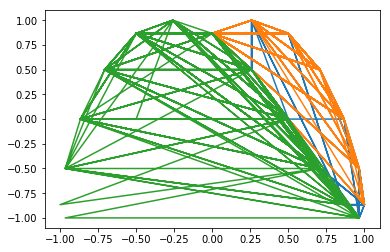

In [507]:
plt.plot(train_data['mnth_sin'], train_data['mnth_cos'])
plt.plot(train_data['day_sin'], train_data['day_cos'])
plt.plot(train_data['hr_sin'], train_data['hr_cos'])

In [508]:
train_data = train_data.drop(['Date', 'Time', 'Hour', 'Month', 'Weekday'], axis=1)
train_data.head()

,Duration,Type,Call Status,Call Id,Match,mnth_sin,day_sin,hr_sin,mnth_cos,day_cos,hr_cos
0,252,Service,Existing Customer Prospect,7.474573e+08,False,1.224647e-16,0.000000,0.258819,8.660254e-01,8.660254e-01,5.000000e-01
28,267,Service,Existing Customer Prospect,1.028604e+09,False,1.224647e-16,0.866025,-0.707107,8.660254e-01,6.123234e-17,5.000000e-01
68,184,Sales,New Prospect,1.067468e+09,False,9.659258e-01,0.866025,-0.500000,-5.000000e-01,6.123234e-17,8.660254e-01
108,142,Current Customer,Current Customer,1.073906e+09,False,8.660254e-01,0.500000,-0.866025,6.123234e-17,8.660254e-01,1.194340e-15
149,309,Service,New Prospect,7.466424e+08,False,1.224647e-16,0.707107,-0.866025,8.660254e-01,5.000000e-01,1.194340e-15


## Preparing Data For Keras

One hot encoding

In [509]:
train_data['Type'] = 'type_' + train_data['Type'].astype(str)
train_data['Call Status'] = 'status_' + train_data['Call Status'].astype(str)
type_dummies = pd.get_dummies(train_data['Type'])
status_dummies = pd.get_dummies(train_data['Call Status'])
train_data = pd.concat([train_data, type_dummies], axis=1)
train_data = pd.concat([train_data, status_dummies], axis=1)
del train_data['Type']
del train_data['Call Status']

train_data.head()

,Duration,Call Id,Match,mnth_sin,day_sin,hr_sin,mnth_cos,day_cos,hr_cos,type_Current Customer,type_Hang-ups,type_Other,type_Sales,type_Service,status_Answering Service/Call Center,status_Current Customer,status_Disconnected in Progress,status_Existing Customer Prospect,status_Hang-up,status_Left Message/Voice Mail,status_New Prospect,status_Other,status_Referral Prospect,status_Repeat Caller
0,252,7.474573e+08,False,1.224647e-16,0.000000,0.258819,8.660254e-01,8.660254e-01,5.000000e-01,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
28,267,1.028604e+09,False,1.224647e-16,0.866025,-0.707107,8.660254e-01,6.123234e-17,5.000000e-01,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
68,184,1.067468e+09,False,9.659258e-01,0.866025,-0.500000,-5.000000e-01,6.123234e-17,8.660254e-01,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
108,142,1.073906e+09,False,8.660254e-01,0.500000,-0.866025,6.123234e-17,8.660254e-01,1.194340e-15,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
149,309,7.466424e+08,False,1.224647e-16,0.707107,-0.866025,8.660254e-01,5.000000e-01,1.194340e-15,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
